### Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import to_categorical, plot_model
from keras.datasets import cifar10

### Load the Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
labels = ['airplane', 'automobile', 'bird', 'cat',  'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [6]:
# class_names = {k: v for k, v in enumerate(labels)}

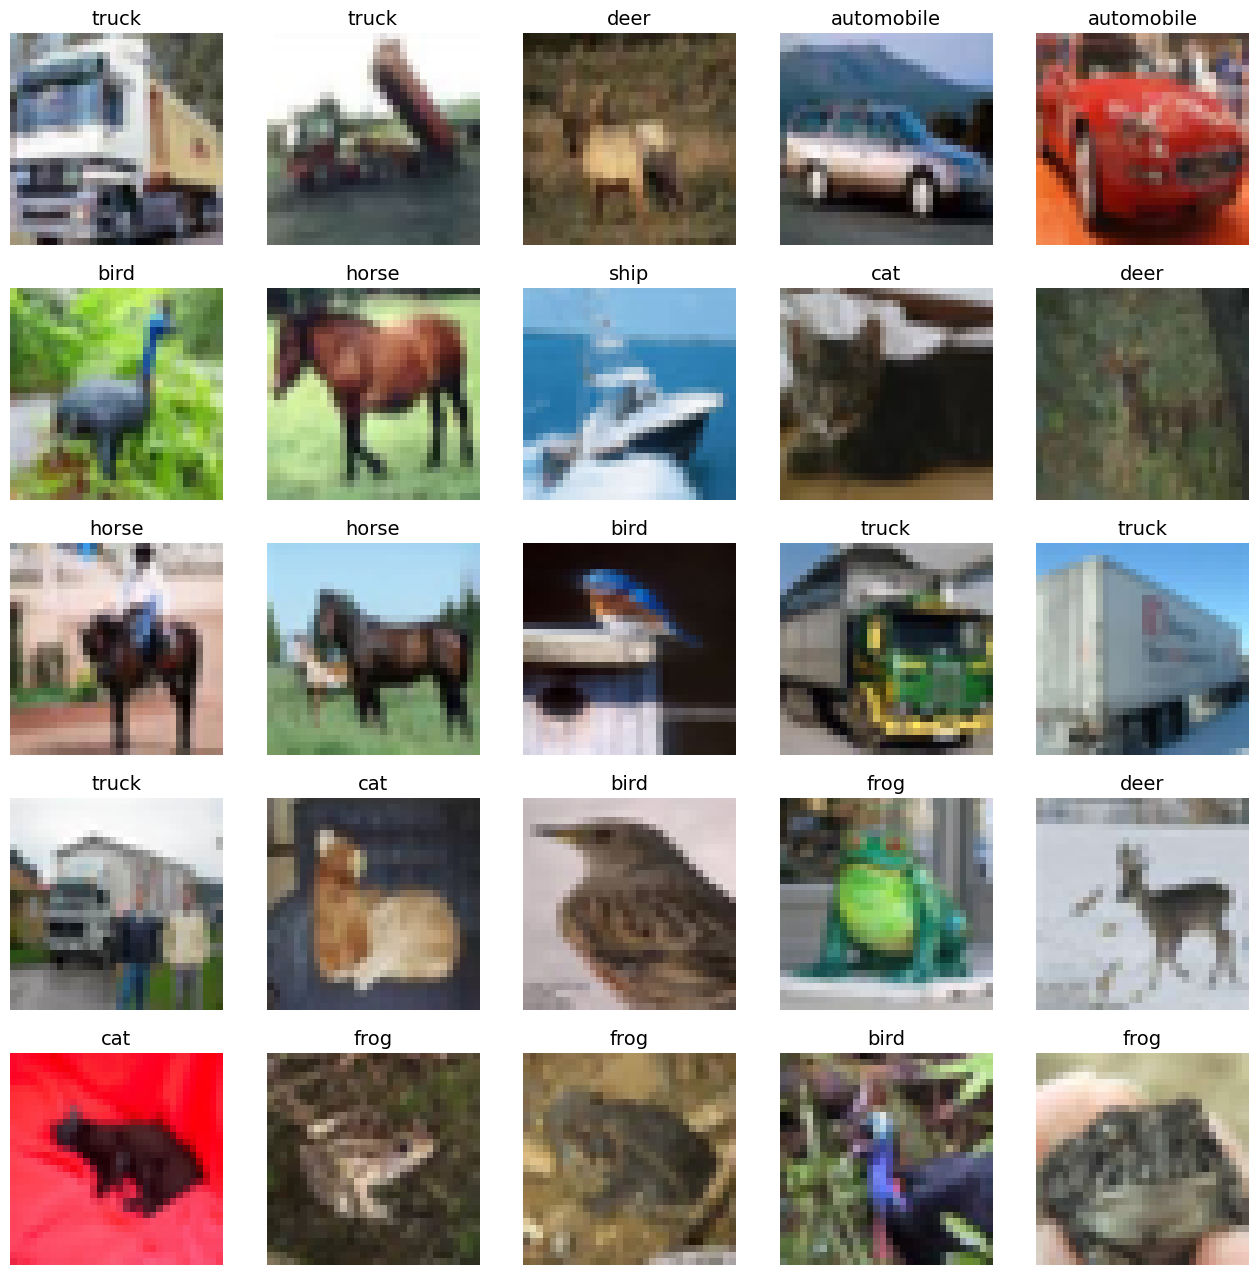

In [7]:
plt.figure(figsize=(16,16)) 
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(labels[y_train[i][0]], fontsize=14)
    plt.axis('off')

### Scale the Data

In [8]:
X_train = X_train / 255
X_test = X_test / 255

### Build the Model

In [9]:
model= Sequential()

# original Size = 32*32*3

# 1st Convolution Layer
model.add(Conv2D(32, 3,
                 activation='relu',
                 input_shape=(32, 32, 3)
                 )) # 30*30*32

model.add(MaxPool2D((2, 2))) # 15*15*32
model.add(Dropout(0.1))

# 2nd Convolution Layer
model.add(Conv2D(32, 3,
                 activation='relu',
                 )) # 13*12*32

model.add(MaxPool2D((2, 2))) # 6*6*32
model.add(Dropout(0.1))

model.add(Flatten()) # 1152

model.add(Dense(256, activation='relu')) # reduced to 256 nodes 

model.add(Dense(128, activation='relu')) # 128 Nodes

model.add(Dense(10, activation='softmax')) # 10 nodes

In [10]:
model.summary()
# Convolution Layer ===> ((shape of width of filter*shape of height filter*number of filters in the previous layer+1)*number of filters)
# Dense Layer ===> (input_dim + 1) * neural units/nodes

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 32)          0

### Compile the Model

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the Model

In [12]:
model.fit(X_train, y_train,
          epochs=10,
          batch_size=10
          )

Epoch 1/10


5000/5000 [==============================] - 37s 7ms/step - loss: 1.4423 - accuracy: 0.4781
Epoch 2/10
5000/5000 [==============================] - 35s 7ms/step - loss: 1.1071 - accuracy: 0.6090
Epoch 3/10
5000/5000 [==============================] - 35s 7ms/step - loss: 0.9639 - accuracy: 0.6628
Epoch 4/10
5000/5000 [==============================] - 35s 7ms/step - loss: 0.8694 - accuracy: 0.6950
Epoch 5/10
5000/5000 [==============================] - 35s 7ms/step - loss: 0.7929 - accuracy: 0.7217
Epoch 6/10
5000/5000 [==============================] - 36s 7ms/step - loss: 0.7342 - accuracy: 0.7421
Epoch 7/10
5000/5000 [==============================] - 37s 7ms/step - loss: 0.6797 - accuracy: 0.7613
Epoch 8/10
5000/5000 [==============================] - 37s 7ms/step - loss: 0.6365 - accuracy: 0.7762
Epoch 9/10
5000/5000 [==============================] - 48s 10ms/step - loss: 0.6010 - accuracy: 0.7879
Epoch 10/10
5000/5000 [==============================] - 40s 8ms/step 

### Model Evaluation

In [13]:
model.evaluate(X_test, y_test, batch_size=1)

10000/10000 [==============================] - 34s 3ms/step - loss: 1.0131 - accuracy: 0.6873


[1.013075590133667, 0.6873000264167786]

### Inferencing

In [19]:
import cv2
import matplotlib.pyplot as plt
# image = cv2.imread('airplane.png')
image = cv2.imread('deer.png')

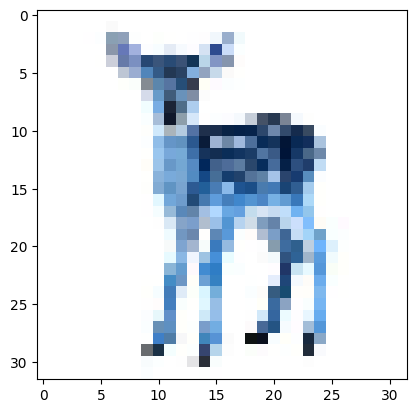

In [20]:
image = cv2.resize(image,(32,32))
plt.imshow(image)

In [21]:
image.shape

(32, 32, 3)

In [22]:
image = image.reshape(-1,image.shape[0], image.shape[1], 3)
image.shape 

(1, 32, 32, 3)

In [24]:
labels[model.predict(image).argmax()] # As accuracy is too low, it can give wrong output

1/1 [==============================] - 0s 49ms/step


'horse'